# Introduction: <br>
### The goal of this project was to determine which neighborhood was best for the average **walking enthusiast**. <br>

![walk](https://media.giphy.com/media/l3V0ca6GTvdB7CzJK/giphy.gif)





### An ideal walker's neighborhood would feature many crosswalks, a high walkability ratio, and a low rate of crime. <br>
* In terms of crosswalks, the metric really is as simple as that. It's just about the number of crosswalks that appear in each neighborhood. <br> 
    * The more crosswalks there are, the safer it will be to cross the street, as there will be more opportunities to have safe and guided crossings. <br>
* For the ratio of walkability, this was calculated by comparing the number of sidewalks in a neighborhood to the number of streets and roads that appear. <br>
    * The more sidewalks there are along each road, the safer walking will be, as pedestrians will not have to walk on the street. <br>
* For the rate of crime, we analyzed the number of crimes that appear in each neighborhood and whether each crime is considered severe or not. <br>
    * For example, littering or graffiti will be far less dangerous for a  pedestrian than a violent crime of some sort. <br>







The results of each metric are compiled together to find the "best".

# Part 1: Crosswalks
## Marcus Villalba

In [9]:
import pandas as pd
import numpy as np
crosswalks = pd.read_csv("CityofPittsburghIntersectionMarkers.csv")
%matplotlib inline
import matplotlib.pyplot as plt
crosswalks.head(5)

,id,type,street,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1559483633,Crosswalk - Other,ELEVENTH ST,f,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,2-3,40.444989,-79.993884
1,785965942,Crosswalk - Two Lined,PENN AVE,f,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-3,40.445717,-79.992465
2,2008474459,Crosswalk - Two Lined,MORNINGSIDE AVE,f,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.479579,-79.930685
3,1207933462,Crosswalk - Two Lined,TECH ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-8,40.440528,-79.942126
4,905740180,Crosswalk - Two Lined,FREW ST,f,Squirrel Hill South,5.0,14.0,42003980500,3.0,14.0,4.0,2-8,40.440468,-79.942267


This first block of code imports everything we'll need and prints the first few rows of data.

In [2]:
numbor = 0
myDict = {}
for index, row in crosswalks.iterrows():
    neighborhood = row['neighborhood']
    for thing in myDict:   
        if(neighborhood == thing):
            myDict[thing] = myDict[thing] + 1
            numbor = numbor + 1
    if(numbor == 0):
        myDict[neighborhood] = 1
    numbor = 0
numList = []
for thing in myDict:
    numList.append(myDict[thing])
sortedNumList = sorted(numList, reverse = True)
max = sortedNumList[0]
num2 = sortedNumList[1]
num3 = sortedNumList[2]
for thingy in myDict:
    if(myDict[thingy] == max):
        print(thingy + ", " + str(max))
for thingy in myDict:
    if(myDict[thingy] == num2):
        print(thingy + ", " + str(num2))
for thingy in myDict:
    if(myDict[thingy] == num3):
        print(thingy + ", " + str(num3))

Central Business District, 402
South Side Flats, 262
Squirrel Hill South, 239


This block of code does a bit more than the first. It iterates through the dataframe and adds each neighborhood to a dictionary as a key. The number of appearances for each neighborhood is then added as the value next to their neighborhood, which indicates the number of crosswalks in each neighborhood. Then, the values are sorted in their own list to determine which neighborhood has the most crosswalks. The top three are printed above.

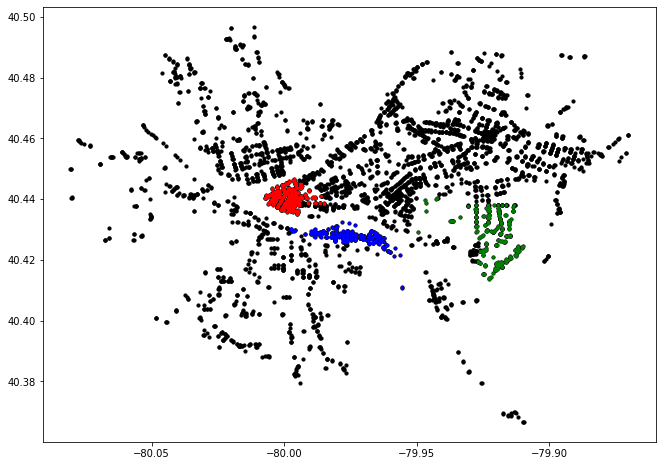

In [3]:
plt.rcParams['figure.figsize'] = [11,8]
plt.scatter(crosswalks['longitude'], crosswalks['latitude'], color='black', s=10)
CBD = crosswalks.loc[crosswalks['neighborhood']=='Central Business District',:]
SSF = crosswalks.loc[crosswalks['neighborhood']=='South Side Flats',:]
SHS = crosswalks.loc[crosswalks['neighborhood']=='Squirrel Hill South',:]
plt.scatter(CBD['longitude'], CBD['latitude'], color='red', s=5)
plt.scatter(SSF['longitude'], SSF['latitude'], color='blue', s=5)
plt.scatter(SHS['longitude'], SHS['latitude'], color='green', s=5)

This block of code works on a scatterplot, showing every single crosswalk in the dataset. They appear in black. If the crosswalk exists in the top three neighborhoods, they are assigned a color based on the neighborhood they exist in. The Central Business District appears in red, the South Side Flats appear in blue, and Squirrel Hill South appears in green. 

Overall, the best neighborhood in terms of the number of crosswalks that exist is the Central Business District, and this is the case by a pretty significant margin.

# Part 2: Walkability

## Ben Douglas  <br>
Data: https://data.wprdc.org/dataset/sidewalk-to-street-walkability-ratio  <br>
This data set is measured the ratio of the length sidewalks and steps to the length street. The higher the ratio, the more sidewalks their are compared to streets. This helps us know which neighborhoods have the most walking space without being by roads.  <br>
First I do the imports needed

In [13]:
#import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
walkability = pd.read_csv("sidewalkstreetratioupload.csv", sep=",")
walkability

,GEOID,NAMELSAD,SidewalkStepLFt,StreetLFt,Ratio
0,420030103001,Block Group 1,13392.83310,30315.86390,0.441776
1,420030103002,Block Group 2,31944.47597,20586.79493,1.551697
2,420030103003,Block Group 3,18655.20798,12122.70024,1.538866
3,420030103004,Block Group 4,14456.19616,11567.62831,1.249711
4,420030201001,Block Group 1,43952.94811,24426.52459,1.799394
...,...,...,...,...,...
2098,421298084023,Block Group 3,NaN,NaN,NaN
2099,421298085001,Block Group 1,NaN,NaN,NaN
2100,421298086001,Block Group 1,NaN,NaN,NaN
2101,421298086002,Block Group 2,NaN,NaN,NaN


This gives us the sidewalk and step length, street length, and ratio for a certain geo id.

In [15]:
temp = pd.read_csv("sidewalkstreetratiotract.csv", sep=",")
temp

,Tract,SidewalkStepLFt,StreetLFt,Ratio
0,4.200301e+10,78448.71321,74592.98738,1.051690192
1,4.200302e+10,170043.96820,103496.13390,1.642998262
2,4.200302e+10,92663.56238,107882.68170,0.858928986
3,4.200303e+10,63741.19798,36574.88060,1.742758881
4,4.200304e+10,46788.76395,31603.32982,1.480501081
...,...,...,...,...
767,4.212981e+10,0.00000,0.00000,#DIV/0!
768,4.212981e+10,0.00000,0.00000,#DIV/0!
769,4.212981e+10,0.00000,0.00000,#DIV/0!
770,4.212981e+10,0.00000,0.00000,#DIV/0!


This gives us the sidewalk and step length, street length, and ratio for a certain tract.

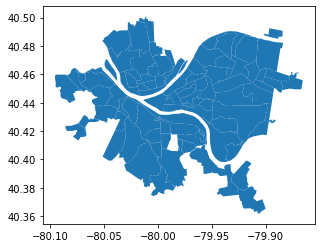

In [16]:
map = geopandas.read_file("Neighborhoods_.shp")
map.plot()


Then I create a general geopandas map using the shape file with the neighborhoods in Pittsburgh.

In [17]:
HoodInfo = pd.read_csv("NeighborhoodsInfo.csv", sep=",")
HoodInfo


,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,globalid,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,1,233,42,3,140500,3,420031405003,Block Group 3,G5030,S,...,15,Ose Akinlotan,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:13,NaN,8.153647e+06,14047.065024
1,2,203,42,3,140100,3,420031401003,Block Group 3,G5030,S,...,15,Ose Akinlotan,20d4605b-258e-441a-a57e-a28fdabb6d30,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:41,NaN,3.407739e+07,30347.886823
2,3,86,42,3,101700,2,420031017002,Block Group 2,G5030,S,...,15,Ose Akinlotan,bf4065e7-c29c-48bd-b529-e7fd99077238,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:59:55,NaN,1.275116e+07,14577.441571
3,4,214,42,3,50900,1,420030509001,Block Group 1,G5030,S,...,15,Ose Akinlotan,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:58:41,NaN,4.997845e+06,14216.959213
4,5,173,42,3,300100,5,420033001005,Block Group 5,G5030,S,...,15,Thomas Scharff,8669d2f0-b886-4519-99d0-bb1015b592b0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:00:19,NaN,8.410563e+06,12003.269761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,215,42,3,141000,1,420031410001,Block Group 1,G5030,S,...,15,Ose Akinlotan,93ce438e-e3ec-410d-a7fd-619646e25dc3,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:20,NaN,5.362506e+06,16007.508980
86,87,211,42,3,51100,1,420030511001,Block Group 1,G5030,S,...,15,Ose Akinlotan,2858633a-175e-459b-a4c9-9aac92bfe033,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:58,NaN,9.519745e+06,19569.102832
87,88,153,42,3,562600,2,420035626002,Block Group 2,G5030,S,...,15,Thomas Scharff,fbc3ab11-0429-476e-80fd-700f969b204a,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:59:44,NaN,1.690646e+07,21634.558817
88,89,16,42,3,170200,1,420031702001,Block Group 1,G5030,S,...,15,Thomas Scharff,39308990-70d5-4da6-b2a0-a5510f18e9b9,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:33,NaN,2.608218e+07,34676.151320


This neighborhood CSV file gives the general information for each neighborhood in pittsburgh and is useful because it gives the geo id for each neighborhood.

In [18]:
HoodInfo['geoid10'] = HoodInfo['geoid10'].astype(int)
#HoodInfo['tractce10'] = HoodInfo['tractce10'].astype(float)
info = HoodInfo.merge(walkability, how='left', left_on='geoid10', right_on='GEOID')
#info = info[['hood', 'SidewalkStepLFt', 'StreetLFt', 'Ratio']]
info = info[['hood', 'Ratio']]
info = info.sort_values('Ratio', ascending=False)
info

,hood,Ratio
3,Bedford Dwellings,6.644908
1,Squirrel Hill North,3.615286
45,Allegheny Center,3.227465
21,Lincoln-Lemington-Belmar,3.092941
86,Terrace Village,3.017543
...,...,...
50,Chartiers City,0.284980
14,Lincoln Place,0.265934
76,Summer Hill,0.255189
37,New Homestead,0.047462


Now I can combine the neighborhood info with the dataset giving ratios for each geo id using the geo ids of both. This is then simplified to just give the neighborhood name and the ratio. The new dataset can be seen above.

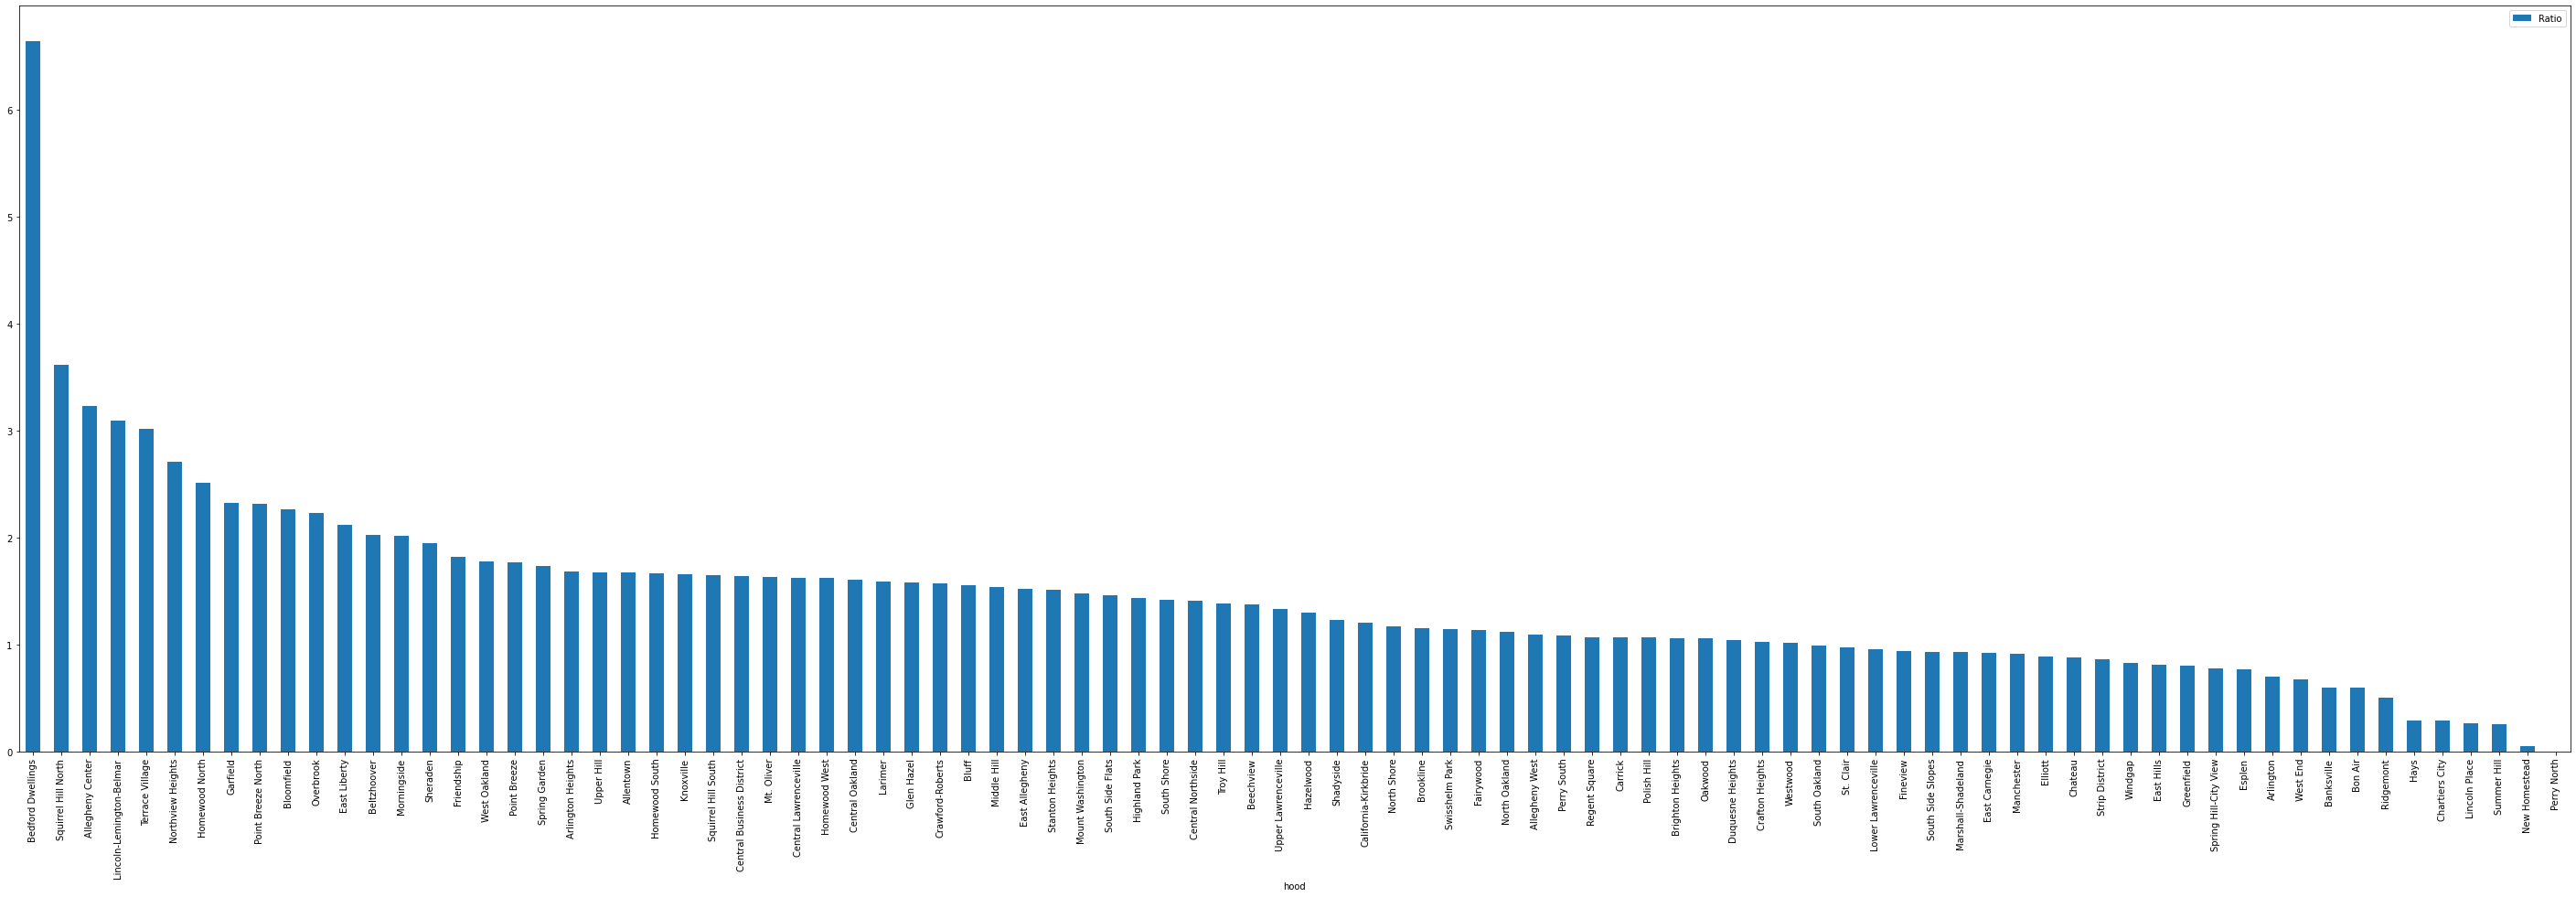

In [19]:
info.plot(kind="bar", figsize=(50,15), x='hood')

With the names and ratios of each neighborhood we can now display them in a bar graph, but it is a bit difficult to read since there are 90 neighborhoods making everything really small.

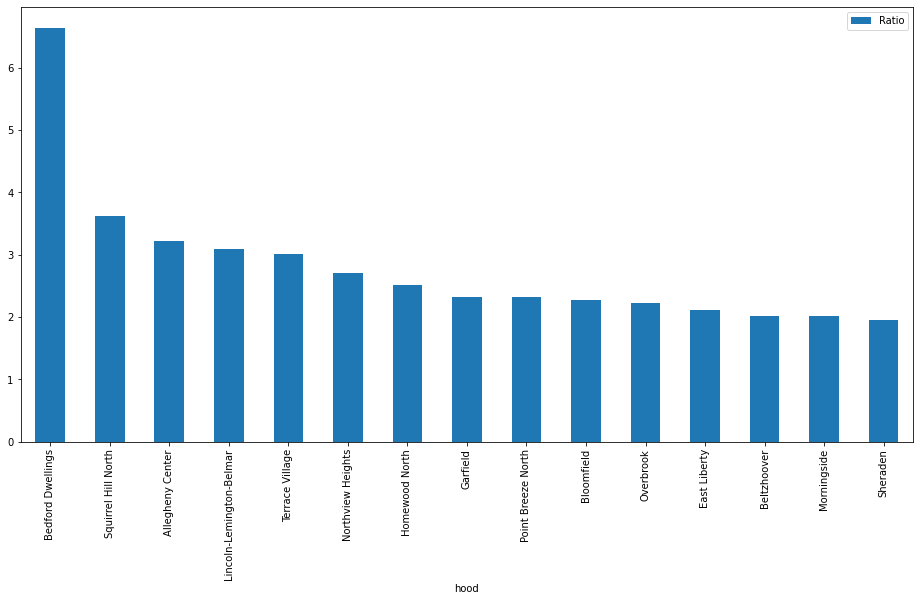

In [20]:
info.head(15).plot(kind="bar", figsize=(16,8), x='hood')

If we limit the data set to only the best 15 walkability ratios we can get a better view of what neighborhoods are the best. We can see that Bedford Dwellings has the highest ratio being nearly double squirrel hill which is second.

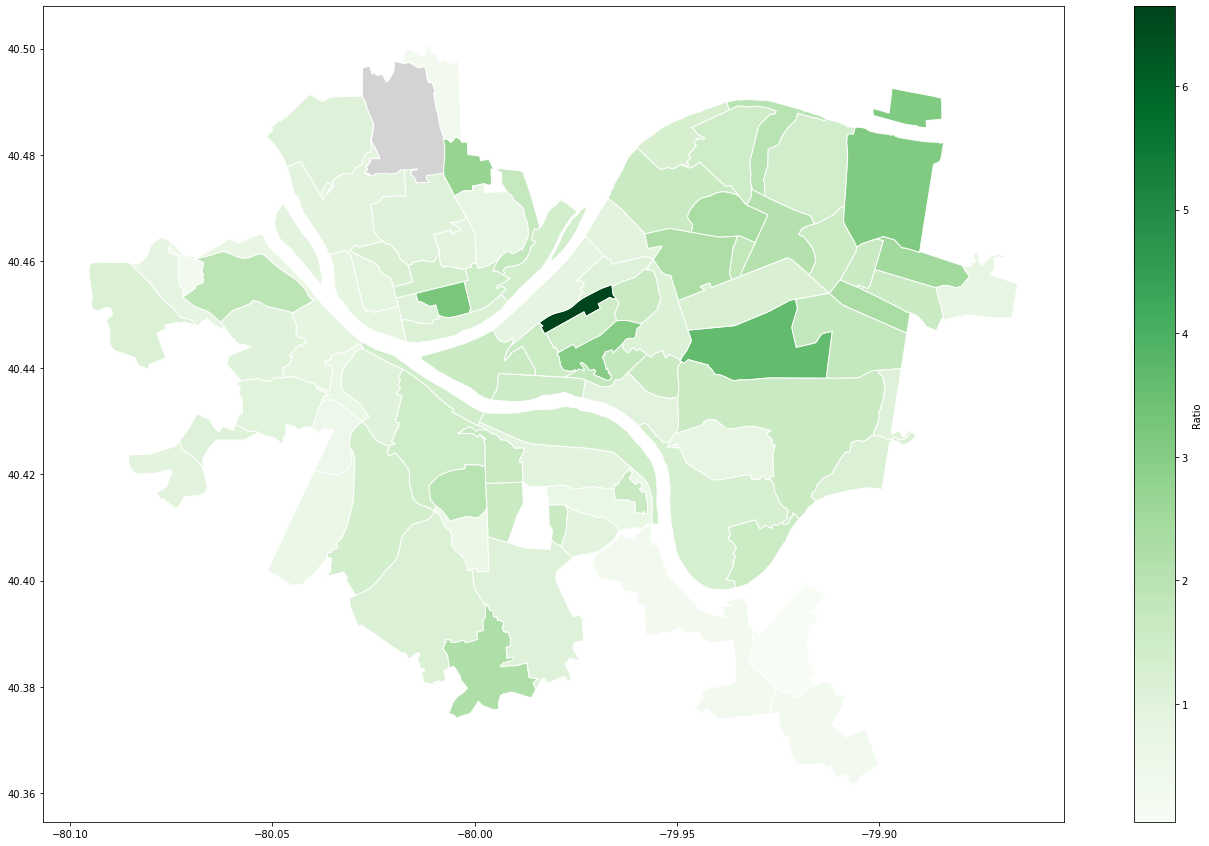

In [21]:
ratioMap = map.merge(info, how = 'left', left_on='hood', right_on='hood')
ratioMap.plot(column='Ratio',
               cmap='Greens',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Ratio"},
               figsize=(25, 15),
               missing_kwds={'color': 'lightgrey'}
               )

I merge the ratio data with the geo map of neighborhoods to display a map with the darkest green areas having the highest ratios

In [22]:
info2 = HoodInfo.merge(walkability, how='left', left_on='geoid10', right_on='GEOID')
info2 = info2[['hood', 'SidewalkStepLFt']]
info2 = info2.sort_values('SidewalkStepLFt', ascending=False)
info2

,hood,SidewalkStepLFt
81,Strip District,92663.562380
45,Allegheny Center,59326.329020
16,Northview Heights,58729.595540
24,Brookline,48177.985360
65,Troy Hill,40911.813860
...,...,...
64,Ridgemont,6369.255036
56,Central Lawrenceville,6121.119267
50,Chartiers City,3393.271454
37,New Homestead,1890.155427


Since the data set includes just the sidewalk and step length for each neighborhood, I thought it would be a good idea to see which neighborhoods just have the most sidewalk in general.

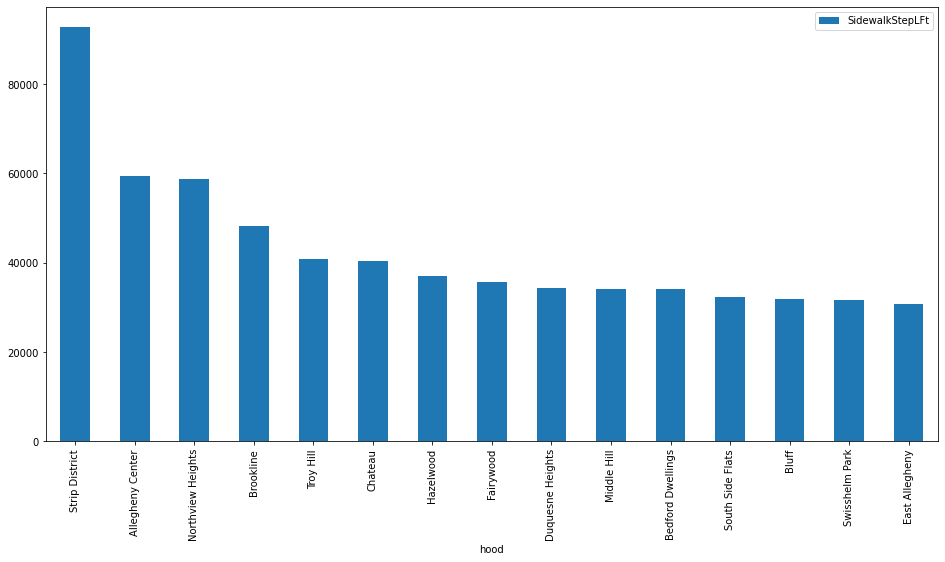

In [23]:
info2.head(15).plot(kind="bar", figsize=(16,8), x='hood')

After graphing it we can see that the strip district has the most sidewalk and stair length overall, followed by Allegheny Center. Allegheny

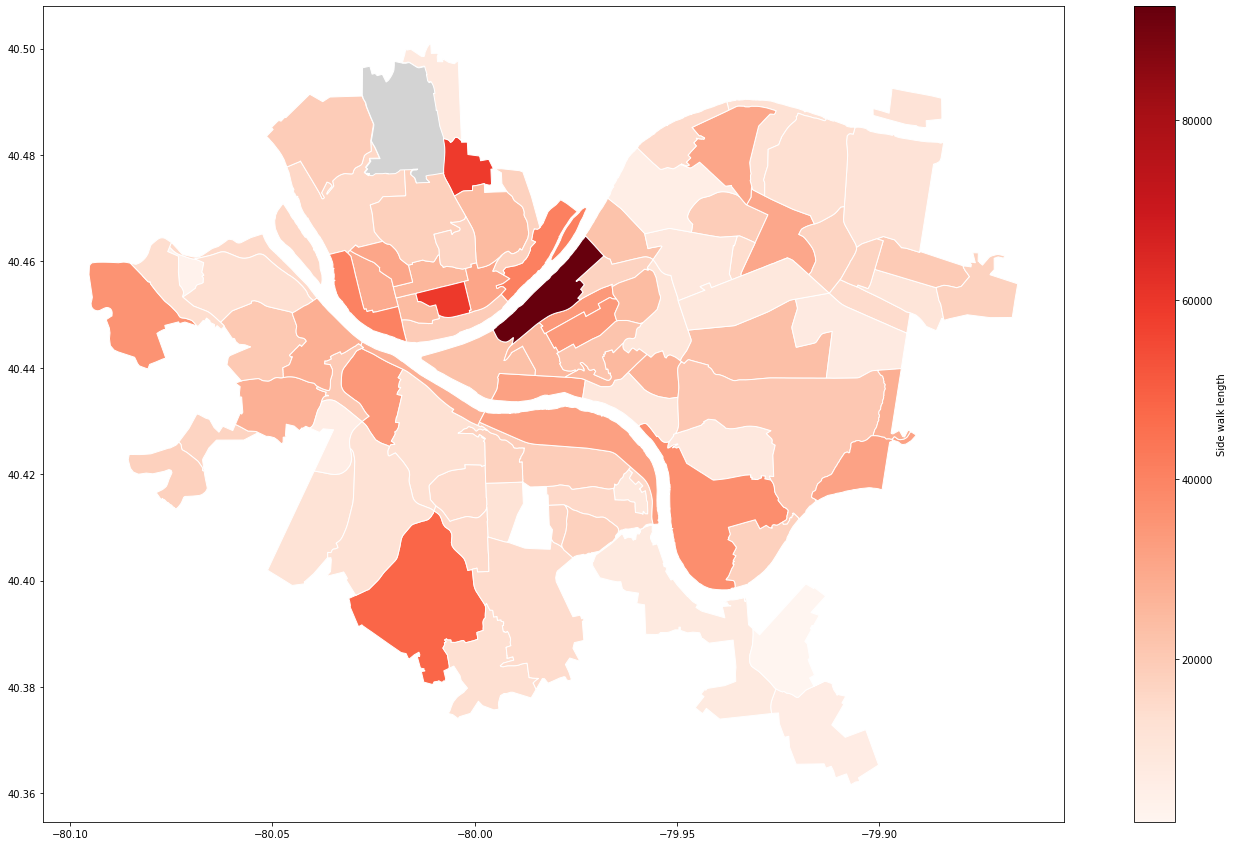

In [24]:
sidewalkMap = map.merge(info2, how = 'left', left_on='hood', right_on='hood')
sidewalkMap.plot(column='SidewalkStepLFt',
               cmap='Reds',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Side walk length"},
               figsize=(25, 15),
               missing_kwds={'color': 'lightgrey'}
               )

# Part 3: Crime

## Josh Ye <br>
https://data.wprdc.org/dataset/arrest-data


* First, I imported the data from the arrest_data.csv file, specifying the column to use
* We can see that the data frame is keeping track of every single line's incident neightborhood

In [28]:
import pandas as pd

data_frame = pd.read_csv("arrest_data.csv", sep=",", usecols=["OFFENSES","INCIDENTNEIGHBORHOOD"])
print(data_frame)

                                                OFFENSES  \
0                                     3929 Retail Theft.   
1           13(a)(16) Possession of Controlled Substance   
2                                     3929 Retail Theft.   
3      5503 Disorderly Conduct. / 5505 Public Drunken...   
4      2702 Aggravated Assault. / 2705 Recklessy Enda...   
...                                                  ...   
58317  2709(a)(1) Harassment by Physical Contact, or ...   
58318  2701(a)(1) Simple Assault - Intent., Know., Re...   
58319  2709(a)(1) Harassment by Physical Contact, or ...   
58320  9015 Failure To Appear/Arrest on Attachment Order   
58321                               2701 Simple Assault.   

            INCIDENTNEIGHBORHOOD  
0                     Bloomfield  
1                   Outside City  
2                       Westwood  
3                 East Allegheny  
4                Crafton Heights  
...                          ...  
58317                    Carrick  

['Point Breeze North', 'Squirrel Hill North', 'Garfield', 'Bedford Dwellings', 'Knoxville', 'Homewood South', 'Middle Hill', 'Oakwood', 'North Oakland', 'Duquesne Heights', 'Glen Hazel', 'East Liberty', 'Westwood', 'Morningside', 'Lincoln Place', 'Perry North', 'Northview Heights', 'Homewood North', 'Arlington Heights', 'Lower Lawrenceville', 'Larimer', 'Lincoln-Lemington-Belmar', 'Bluff', 'Fairywood', 'Brookline', 'Hays', 'Beltzhoover', 'Greenfield', 'East Carnegie', 'North Shore', 'Allentown', 'Bon Air', 'Allegheny West', 'Crafton Heights', 'Manchester', 'Marshall-Shadeland', 'Highland Park', 'New Homestead', 'Central Northside', 'Polish Hill', 'Overbrook', 'Friendship', 'Homewood West', 'Central Business District', 'East Allegheny', 'Allegheny Center', 'Central Oakland', 'Brighton Heights', 'South Side Slopes', 'Arlington', 'Chartiers City', 'Carrick', 'Bloomfield', 'Banksville', 'Mount Washington', 'East Hills', 'Central Lawrenceville', 'West End', 'Esplen', 'Point Breeze', 'Hazelw

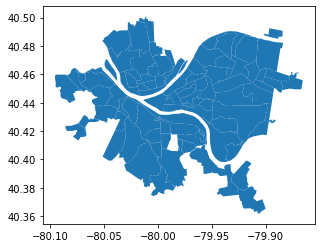

In [29]:
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe
locations = neighborhoods['hood'].tolist()
print(locations)

* As there is no obvious amount of incidents field, I would need to track this through iteration.
* I wanted this information to be trimmed down so that it would track every location and have its own value to count how many instances of a crime.
* I used a dictionary as they have an easy way to find the key, without having to iterate through the data structure.
    * If the dictionary does not have a neighborhood within its keys, it would start it would a default value of 1.
    * If the dictionary had the key, take its value and update it by 1.

In [30]:
#Variables
dictionary = {} #Tracks all instances of crimes
dSevere = {} #Specifically instances of severe crimes
dNotSevere = {} #Specifically non-severe crimes
keywords = ["Homicide", "Death" ,"Terroristic", "Sexual", "Rape", "Assault", "DUI", "Firearm", "Stalking", "Harassment", "Vehicle"] #used to check more severe crimes
rowNum = 0

#Helper function to add to a dictionary, checks if it already exists, and adds if it does.
#Two parameters: (Location, Crime)
#Returns: Nothing
def addToDictionary(location, crime): 
    if(location in dictionary): #if the item is within the dictionary, update the value by 1
        value = int(dictionary.get(location)) + 1
        dictionary.update({location : value})
        if withinList(crime, keywords) == True: #Checks if the crime was severe, and updates the specific dictionary
            value = int(dSevere.get(location)) + 1
            dSevere.update({location : value})
        else:
            value = int(dNotSevere.get(location)) + 1
            dNotSevere.update({location : value})
    else: #otherwise, add the item to the dictionary with a default of 1
        dictionary.update({location : 1 })
        if withinList(crime, keywords) == True: #Checks if the crime was severe, needs to update both dictionaries to avoid NoneTypes/Null errors
            dSevere.update({location : 1})
            dNotSevere.update({location : 0})
        else:
            dNotSevere.update({location : 1})
            dSevere.update({location : 0})
    return


#Helper function that skims over a list to check if the items in the list are within a string.
#Parameters: (String to check, list to skim)
#Returns: boolean (T if within / F if not)
def withinList(crime, keywords):
    for key in keywords:
        if str(crime).find(key) != -1:
            return True     
    return False


#Main 
for row in data_frame.iterrows(): #for every row, 
    if(pd.isnull(data_frame.loc[rowNum, "INCIDENTNEIGHBORHOOD"])): #If no location, ignore
        rowNum+=1
        continue
        
    #Else 
    crime = data_frame.loc[rowNum, "OFFENSES"]
    if(data_frame.loc[rowNum, "INCIDENTNEIGHBORHOOD"] == "Mount Oliver"): #Specifically checking for Mount Oliver in order to fix naming issues
        addToDictionary("Mt. Oliver", crime)
        rowNum+=1 #iterate
    else:
        location = data_frame.loc[rowNum, "INCIDENTNEIGHBORHOOD"] #All other locations
        addToDictionary(location, crime)
        rowNum+=1 #iterate
    
    
for key,value in dictionary.items(): #for all key,value pairs within the dictionaries
    print(str(key) + " : " + str(value) + "\n\tSevere : " + str(dSevere[key]) + "\tNot Severe : " + str(dNotSevere[key]) + "\n")

Bloomfield : 880
	Severe : 349	Not Severe : 531

Outside City : 274
	Severe : 59	Not Severe : 215

Westwood : 203
	Severe : 108	Not Severe : 95

East Allegheny : 1893
	Severe : 363	Not Severe : 1530

Crafton Heights : 513
	Severe : 293	Not Severe : 220

Greenfield : 473
	Severe : 220	Not Severe : 253

Brookline : 1196
	Severe : 634	Not Severe : 562

Regent Square : 32
	Severe : 15	Not Severe : 17

East Liberty : 1652
	Severe : 580	Not Severe : 1072

East Hills : 1026
	Severe : 561	Not Severe : 465

Carrick : 2102
	Severe : 1018	Not Severe : 1084

Allegheny Center : 1122
	Severe : 290	Not Severe : 832

South Side Flats : 3053
	Severe : 1323	Not Severe : 1730

Sheraden : 1132
	Severe : 620	Not Severe : 512

East Carnegie : 47
	Severe : 31	Not Severe : 16

Golden Triangle/Civic Arena : 83
	Severe : 27	Not Severe : 56

Point Breeze North : 249
	Severe : 127	Not Severe : 122

Perry South : 954
	Severe : 477	Not Severe : 477

Allentown : 855
	Severe : 377	Not Severe : 478

North Shore : 722


* With this information, I could sort the data to show the locations that were the best. (i.e Locations with the lowest crime rates)
* I created single dataframe that contains the total amounts for all 3 categories, and sorted them by the total

In [31]:
full_frame = pd.DataFrame([dictionary, dSevere, dNotSevere]).transpose().rename(columns={0 : "Total", 1 : "Severe", 2 : "Non-Severe"}).sort_values(by="Total")
#Creates a dataframe using a list of dictionaries, transpose to rotate the frame to be vertical, then renamed the columns, and sorted by the data by the total column

print(full_frame)

                           Total  Severe  Non-Severe
Mt. Oliver Neighborhood        2       1           1
Troy Hill-Herrs Island         6       1           5
Mt. Oliver Boro               18       8          10
Central Northside             23       4          19
Ridgemont                     32      11          21
...                          ...     ...         ...
Homewood South              1863     690        1173
East Allegheny              1893     363        1530
Carrick                     2102    1018        1084
South Side Flats            3053    1323        1730
Central Business District   3570    1124        2446

[98 rows x 3 columns]


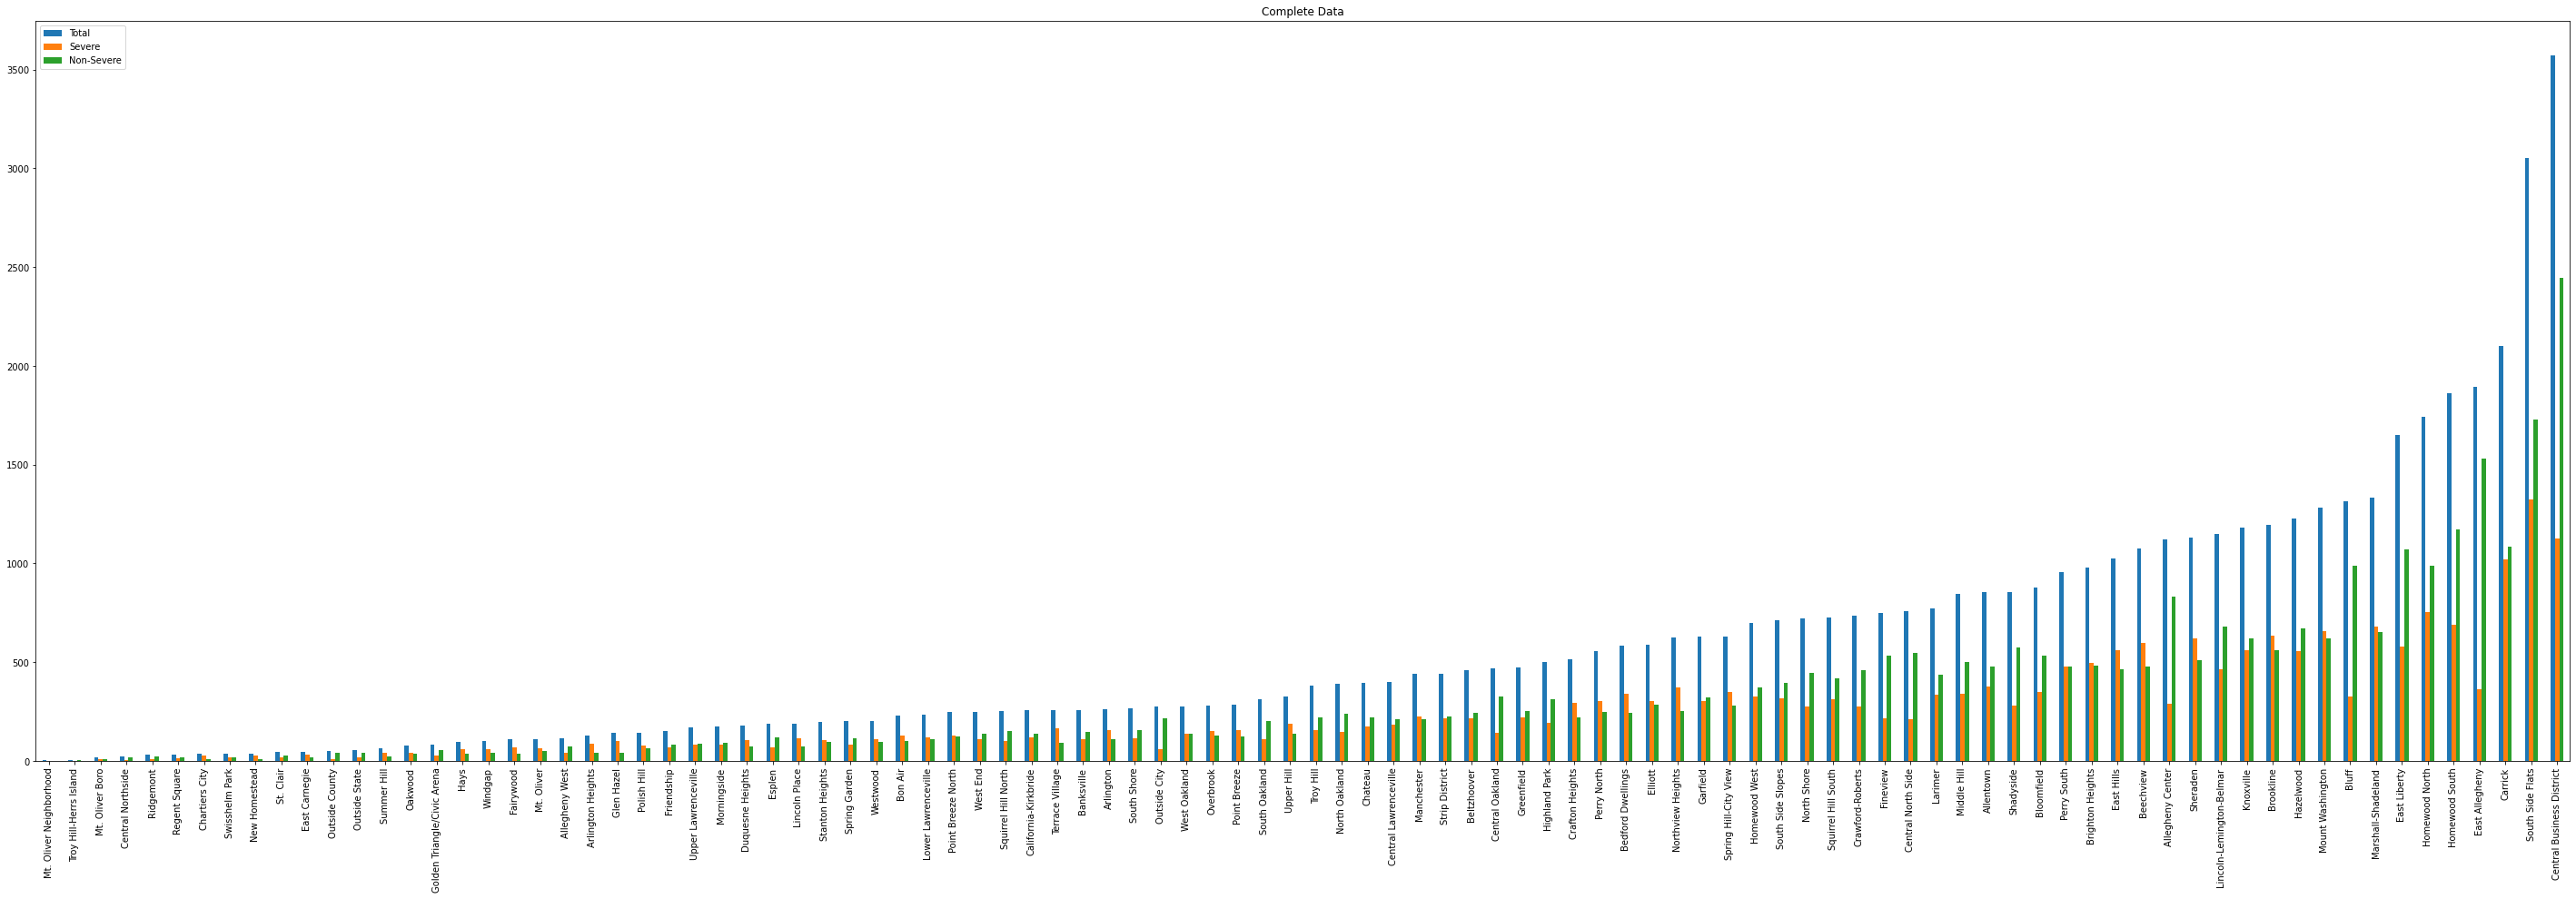

In [32]:
full_frame.plot(kind="bar", figsize=(50,15), title="Complete Data")

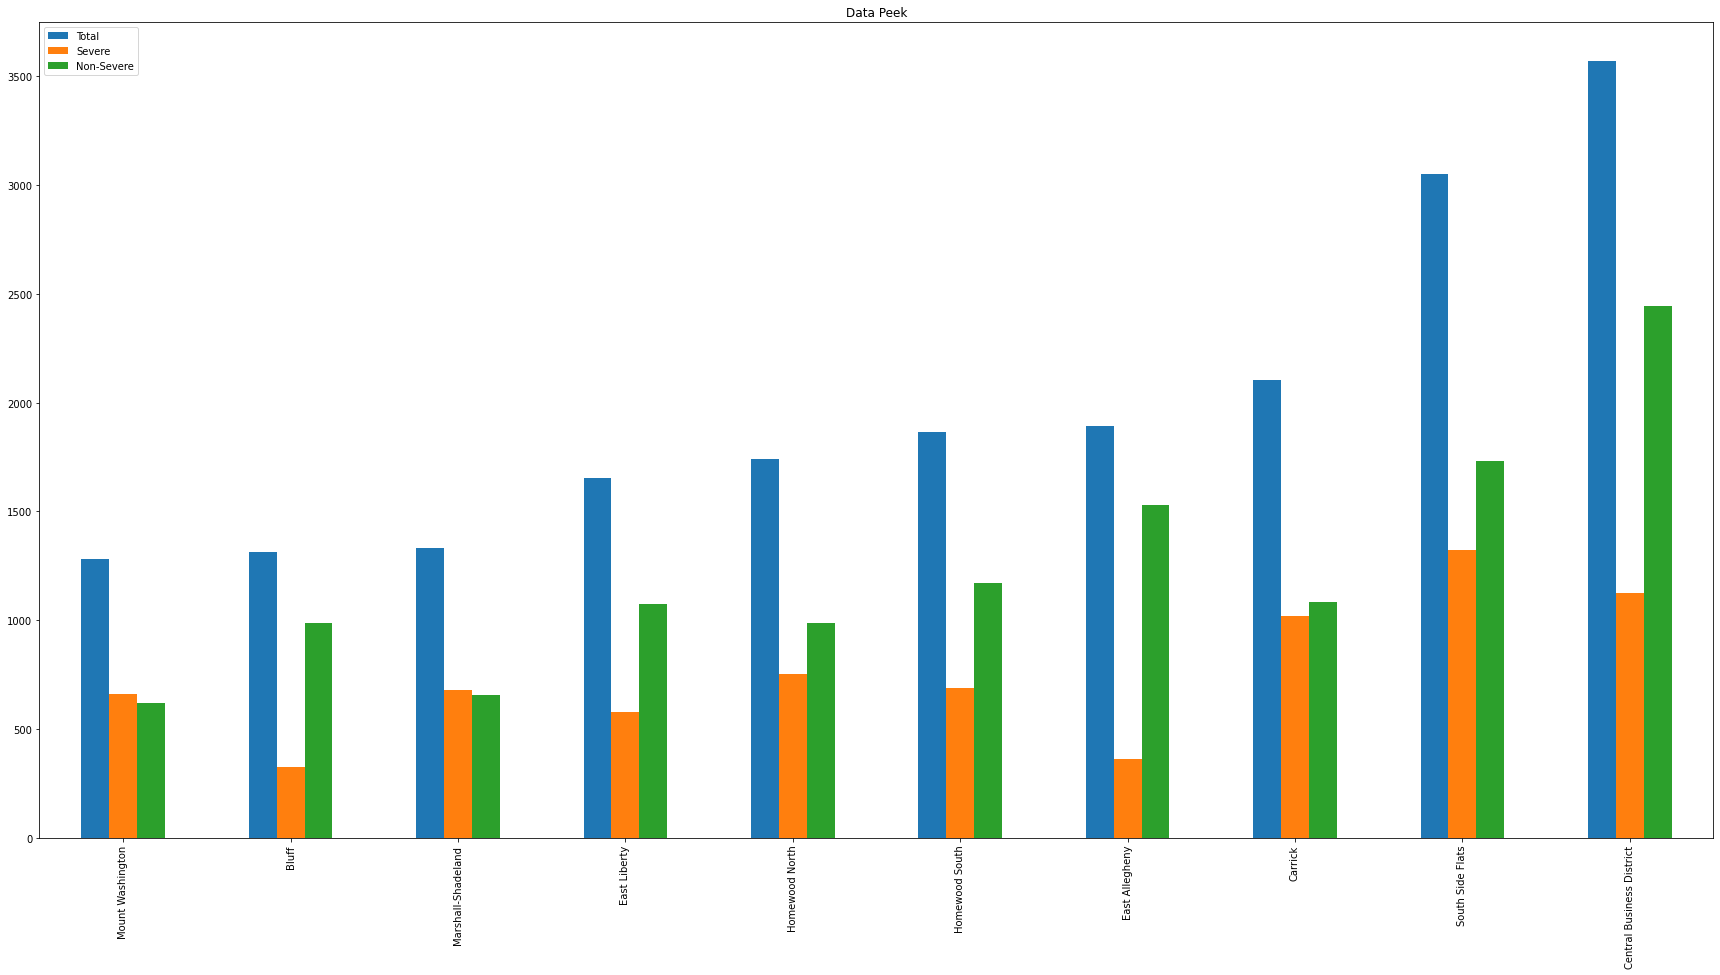

In [68]:
full_frame.tail(10).plot(kind="bar", figsize=(30,15), title="Data Peek") #looking at the 10 worst

* Then I plotted the map, based upon the amount.
    * As there are very few locations with high amounts of arrests it's easier to highlight those areas.

,hood,Total,Severe,Non-Severe
38,Central Northside,23,4,19
64,Ridgemont,32,11,21
85,Regent Square,32,15,17
50,Chartiers City,38,29,9
82,Swisshelm Park,38,18,20
...,...,...,...,...
5,Homewood South,1863,690,1173
44,East Allegheny,1893,363,1530
51,Carrick,2102,1018,1084
88,South Side Flats,3053,1323,1730


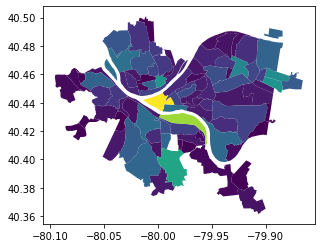

In [33]:
complete_map = neighborhoods.merge(full_frame, how='left', left_on='hood', right_on=full_frame.index) #merge map and dataframe
complete_map.plot(column='Total') #plot based upon totals
complete_map[['hood','Total','Severe','Non-Severe']].sort_values(by='Total', ascending=True) #Prints to check if merge succeeded
#print(complete_map['geometry'])

* Finally, I made the graph more readable.

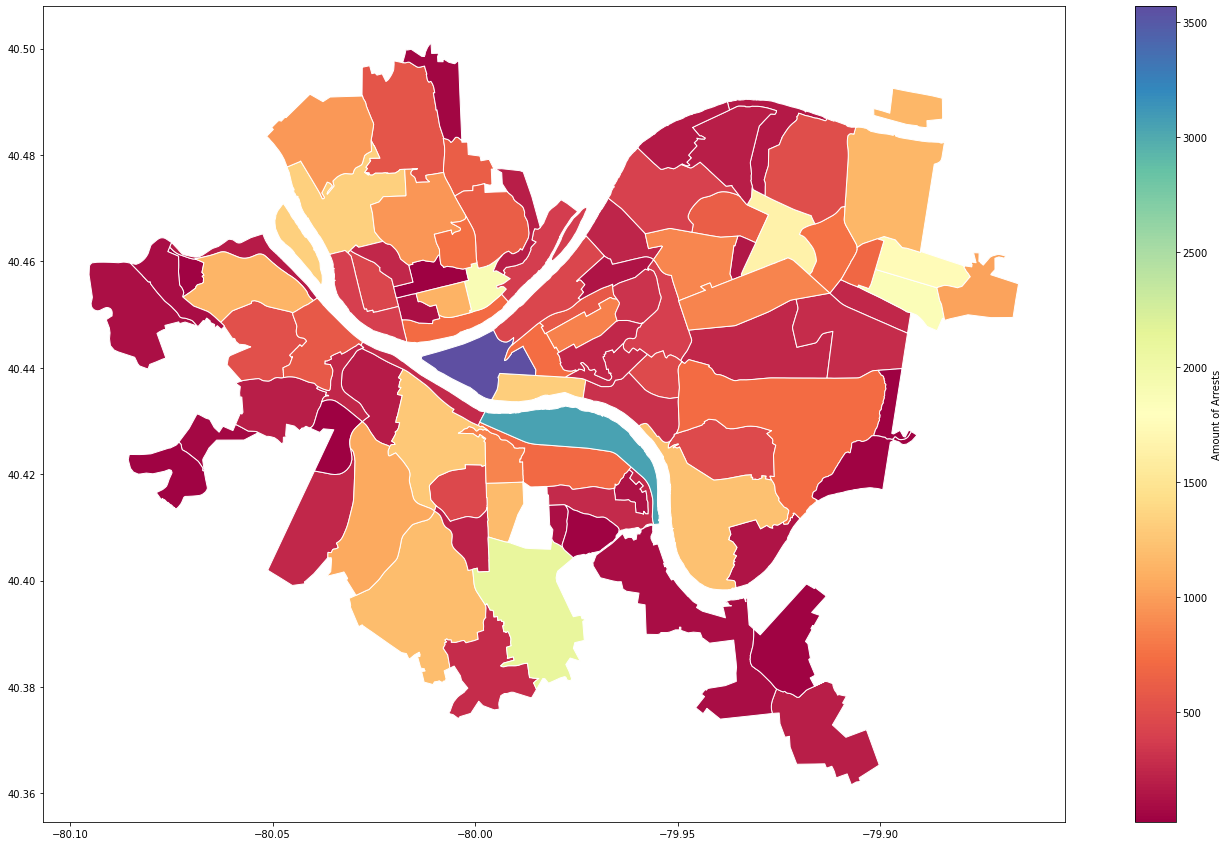

In [34]:
complete_map.plot(column='Total', # set the data to be used for coloring
               cmap='Spectral',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Amount of Arrests"}, # label the legend
               figsize=(25, 15), # set the size
               )

* The conclusion based upon this arrest data's time frame is that:
    * There are very few locations that have high amounts of arrests:
        * The 3 worst locations are Carrick, South Side Flats, and the Central Business District
    * There are many locations where there are low arrest rates:
        * The overall "best" neighborhood would have to be Mt. Oliver or the Troy Hill / Herrs Island area.
        * If the Mt. Oliver is not being considered, then the overall "best" would be Central Northside.
        * If we're talking specifically the Oakland area, West Oakland 274, South Oakland 311, North Oakland 390, Central Oakland 469
* If we look at maps that focus on both Severe Crimes and Non-Severe, the outcomes do not change.

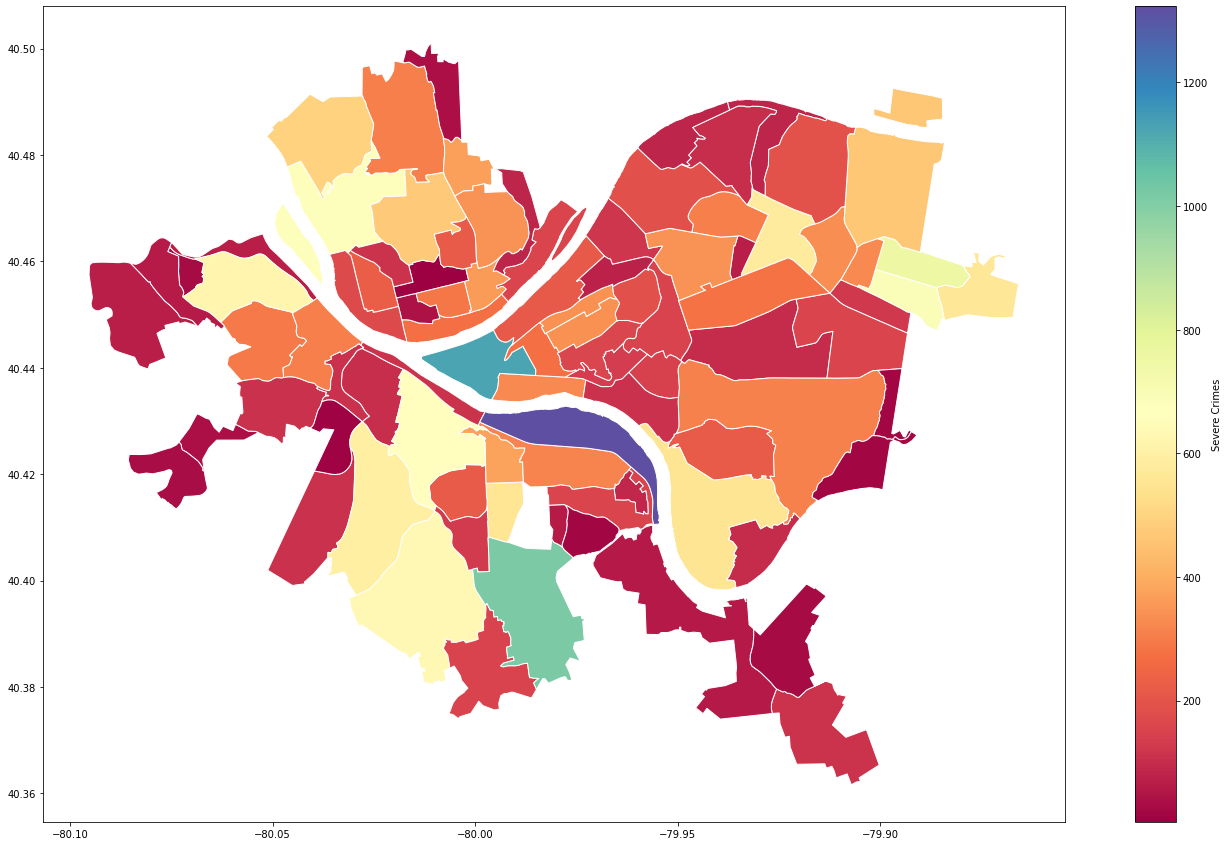

In [35]:
complete_map.plot(column='Severe', # set the data to be used for coloring
               cmap='Spectral',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Severe Crimes"}, # label the legend
               figsize=(25, 15),         # set the size
               )

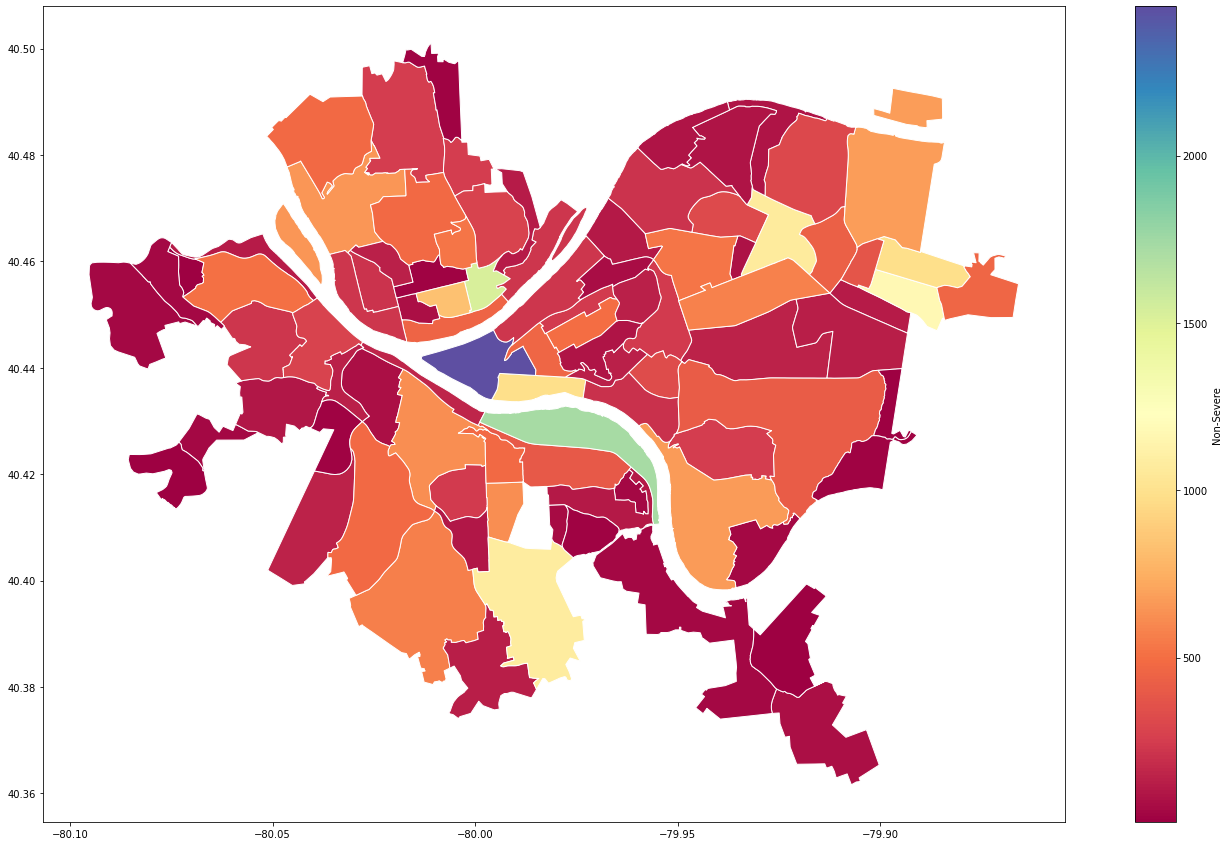

In [36]:
complete_map.plot(column='Non-Severe', # set the data to be used for coloring
               cmap='Spectral',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Non-Severe"}, # label the legend
               figsize=(25, 15),         # set the size
               )

* Below is a map to be used to assist determining locations

![map](map.jpg)

# Part 4: Merge
* In this section we combined all of our data as dataframes, to try and find an overall best.

In [51]:
myDict
dictFrame = pd.DataFrame.from_dict(myDict, orient='index').rename(columns={0 : "Crosswalks"}) #converts myDict (part 1) into a dataframe
frame_test = pd.concat([dictFrame, full_frame], axis=1) #combines part 1 & part 3 into a singular dataframe
frame_test = pd.concat([frame_test, info.set_index('hood')], axis=1) #combines (parts 1&3) with part 2's ratios
combined_frame = frame_test.dropna() #drops any values that may have NaN

In [61]:
#Sort the combined data by the most crosswalks.
combined_frame.sort_values(by=['Crosswalks'], ascending=False) 

,Crosswalks,Total,Severe,Non-Severe,Ratio
Central Business District,402.0,3570.0,1124.0,2446.0,1.640231
South Side Flats,262.0,3053.0,1323.0,1730.0,1.464234
Squirrel Hill South,239.0,727.0,310.0,417.0,1.651588
Bloomfield,192.0,880.0,349.0,531.0,2.265926
Shadyside,190.0,855.0,282.0,573.0,1.227199
...,...,...,...,...,...
Fineview,3.0,750.0,218.0,532.0,0.936805
Summer Hill,3.0,63.0,40.0,23.0,0.255189
Chartiers City,1.0,38.0,29.0,9.0,0.284980
St. Clair,1.0,45.0,18.0,27.0,0.974095


In [62]:
#Sort the combined data by lowest total crimes
combined_frame.sort_values(by=['Total'])

,Crosswalks,Total,Severe,Non-Severe,Ratio
Central Northside,45.0,23.0,4.0,19.0,1.406429
Regent Square,15.0,32.0,15.0,17.0,1.064720
New Homestead,1.0,38.0,27.0,11.0,0.047462
Chartiers City,1.0,38.0,29.0,9.0,0.284980
Swisshelm Park,7.0,38.0,18.0,20.0,1.147529
...,...,...,...,...,...
Homewood South,81.0,1863.0,690.0,1173.0,1.665439
East Allegheny,60.0,1893.0,363.0,1530.0,1.521016
Carrick,73.0,2102.0,1018.0,1084.0,1.063746
South Side Flats,262.0,3053.0,1323.0,1730.0,1.464234


In [63]:
#Sort the combined data by the highest walkability ratio
combined_frame.sort_values(by=['Ratio'], ascending=False)

,Crosswalks,Total,Severe,Non-Severe,Ratio
Bedford Dwellings,8.0,582.0,339.0,243.0,6.644908
Squirrel Hill North,112.0,252.0,101.0,151.0,3.615286
Allegheny Center,41.0,1122.0,290.0,832.0,3.227465
Lincoln-Lemington-Belmar,29.0,1148.0,466.0,682.0,3.092941
Terrace Village,67.0,255.0,163.0,92.0,3.017543
...,...,...,...,...,...
Hays,7.0,98.0,60.0,38.0,0.286175
Chartiers City,1.0,38.0,29.0,9.0,0.284980
Lincoln Place,15.0,190.0,116.0,74.0,0.265934
Summer Hill,3.0,63.0,40.0,23.0,0.255189


In [65]:
#Sorting the info by both crosswalks, and walkability ratio
combined_frame.sort_values(by=['Crosswalks', 'Ratio'], ascending=False)

,Crosswalks,Total,Severe,Non-Severe,Ratio
Central Business District,402.0,3570.0,1124.0,2446.0,1.640231
South Side Flats,262.0,3053.0,1323.0,1730.0,1.464234
Squirrel Hill South,239.0,727.0,310.0,417.0,1.651588
Bloomfield,192.0,880.0,349.0,531.0,2.265926
Shadyside,190.0,855.0,282.0,573.0,1.227199
...,...,...,...,...,...
Fineview,3.0,750.0,218.0,532.0,0.936805
Summer Hill,3.0,63.0,40.0,23.0,0.255189
St. Clair,1.0,45.0,18.0,27.0,0.974095
Chartiers City,1.0,38.0,29.0,9.0,0.284980


* As our data does not overlap too much, the overall best neighborhood would have to be **Squirrel Hill South**.
    * As both Central Business District and South Side Flats, are the areas with the highest crime rates, they should not be the best.

## Personal Conclusion
### Marcus Villalba - I'm not from Pittsburgh, so I've never really had the chance to familiarize myself with the different neighborhoods of the area. That said, my initial choice for determining the best neighborhood for walking enthusiasts was the Central Business District. It alone has over a hundred more crosswalks than the neighborhood in second place in terms of crosswalks; however, the appearance of crime noted in Josh's section cannot be ignored. My next pick would be the South Side Flats, but Josh also found that the crime was high there too. Therefore, my ultimate pick for the best neighborhood for walking enthusiasts has to be Squirrel Hill South.
### Ben Douglas - 
### Josh Ye - Even though I've lived in the Pittsburgh area for my entire life, I generally do not know anything about most of these neighborhoods. My personal "best" would have to the South Oakland area, as that's where I'm currently living